In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Read data

In [274]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


Inspect Data

In [275]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [276]:
print('Train data shape: ',train.shape)
print('Test data shape: ',test.shape)

Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [277]:
#remove the unnecessary id column it does not play any significance role in determing the target variable
train.drop('Id',axis=1,inplace=True)

Separate numerical and categorical features

In [278]:
num_features = train.select_dtypes(include='number')
num_features.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are 37 numerical features including the target variable i.e.'SalePrice' 

In [279]:
cat_features = train.select_dtypes(include='object')
cat_features.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


There are 43 categorical features

Check for nulls

In [280]:
#number of null values in numerical features
num_features.isna().sum()[num_features.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [281]:
#number of null values in categorical features
cat_features.isna().sum()[cat_features.isna().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Discard the features those have more than 80% null values since:

1. Imputing the nulls with most frequent value or even 'missing' will lead to decrease in variability of data and not leading to accurate results.

2. We have 80 features corresponding to 1460 features, it is necessary to discard the less prominent features to avoid curse of dimensionality. 

In [282]:
#Create mask to obtain features with more than 80% null values
null_mask = cat_features.isna().sum()/len(train) > 0.80

features_to_remove = cat_features.columns[null_mask]
features_to_remove

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [283]:
train.drop(columns=features_to_remove,inplace=True)

Exploring Numerical Features

In [284]:
num_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

* MSSubClass: Ordinal in nature and identifies the type of dwelling involved in the sale.
* LotFrontage, LotArea : Continuous Variables
* OverallQual, OverallCond : Ordinal Variables
* YearBuilt: Original construction date,Continuous Variable 
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions), Continuous Variable
* MasVnrArea: Continuous Variable
* BsmtFinSF1, BsmtFinSF2 : Continuous in nature (tally with BsmtFinType1, BsmtFinType2 respectively)
* BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea: Continuous variable
* BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr: Ordinal Features
* TotRmsAbvGrd,Fireplaces: Ordinal Features
* GarageYrBlt: Continuous Variable
* GarageCars: Ordinal Variable
* GarageArea: Continuous Variable
* WoodDeckSF, OpenPorchSF,EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea: Continuous Variable
* MiscVal : Continuous Variable
* MoSold, YrSold: Nominal Variable
* SalePrice : Continuous Features

* LotFrontage, MasVnrArea, GarageYrBlt: These variables contain null values

Dealing with nulls in LotFrontage variable

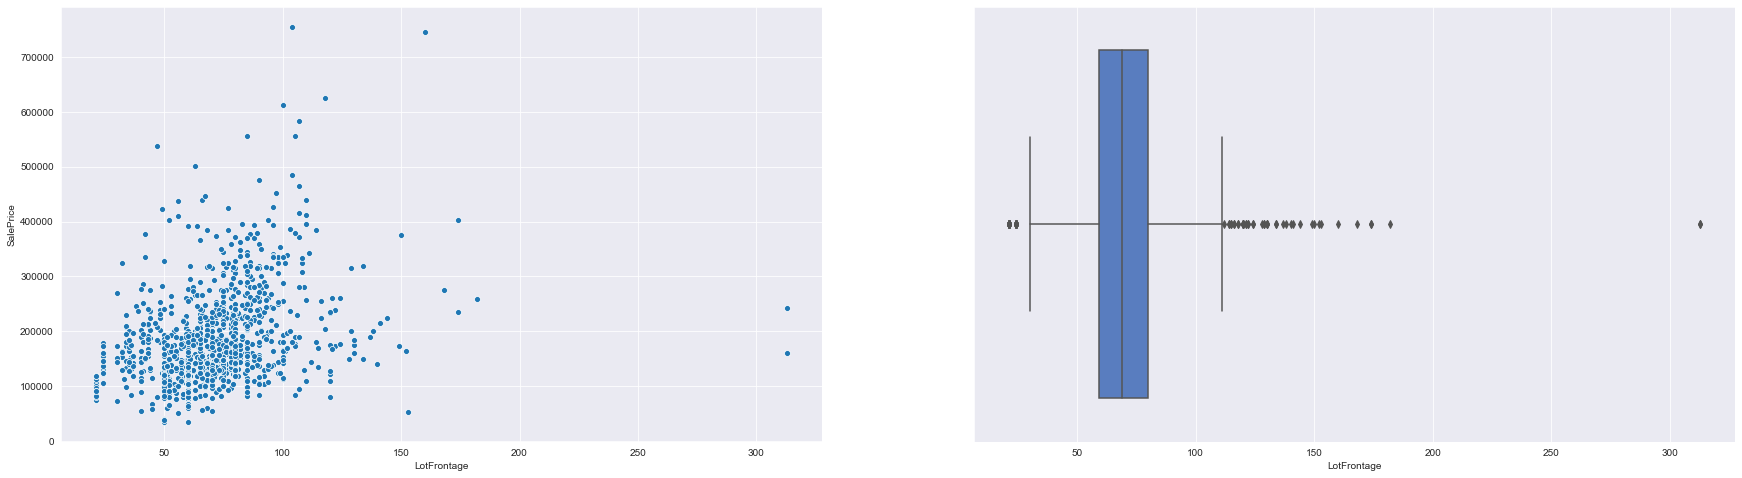

In [285]:
sns.set_style('darkgrid')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,8))
sns.scatterplot('LotFrontage','SalePrice',data=num_features,ax=ax1)
sns.boxplot('LotFrontage',data=num_features,ax=ax2,palette='muted')

* It seems that feature 'LotFrontage' has got some outliers.
* We will be capping the outliers that lie beyond the upper range only.
* Then impute the missing values with mean.

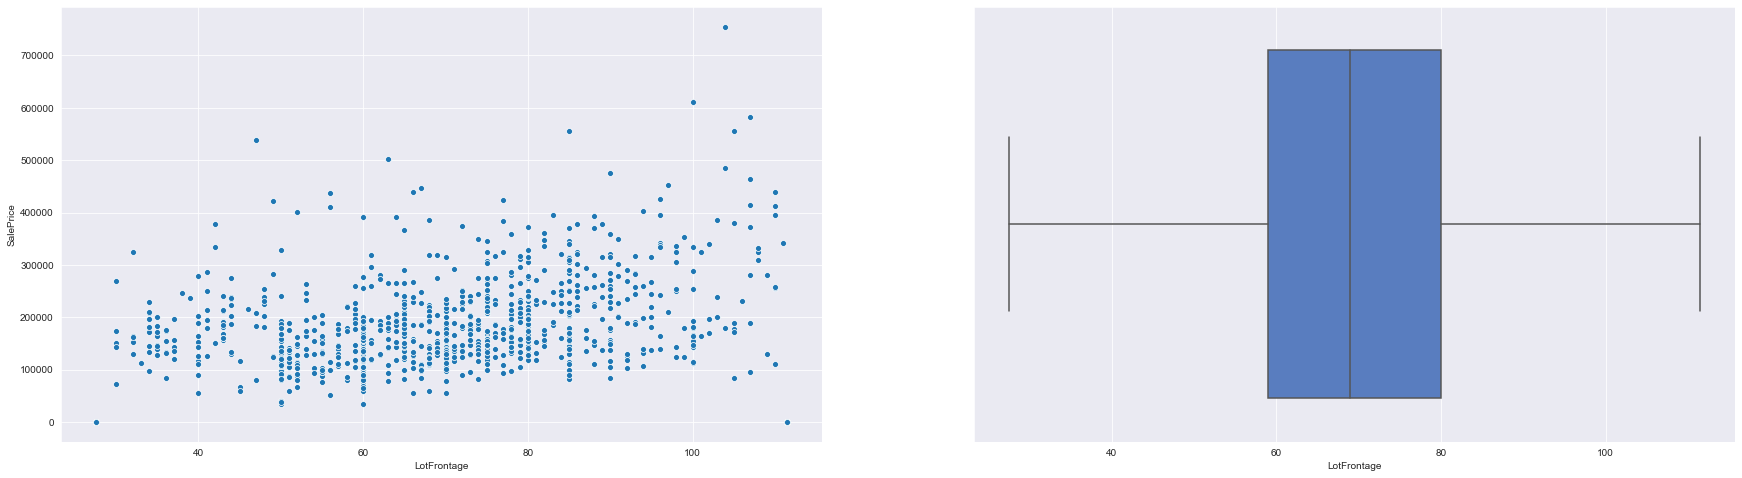

In [286]:
upper_quantile = train['LotFrontage'].quantile(0.75)
lower_quantile = train['LotFrontage'].quantile(0.25)
IQR = upper_quantile - lower_quantile
upper_range = upper_quantile + IQR*1.5
lower_range = lower_quantile - IQR*1.5
train[train['LotFrontage']>upper_range] = upper_range
train[train['LotFrontage']<lower_range] = lower_range


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,8))
sns.scatterplot('LotFrontage','SalePrice',data=train,ax=ax1)
sns.boxplot('LotFrontage',data=train,ax=ax2,palette='muted')

In [287]:
#Impute Null Values
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)

Dealing with nulls in MasVnrArea variable

In [288]:
train.loc[train['MasVnrArea'].isna(), 'MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

MasVnrArea is null where MasVnrType is not present. Therefore we can impute null values in MasVnrArea by 0

In [289]:
train['MasVnrArea'].fillna(0, inplace=True)

Dealing with nulls in GarageYrBlt variable

In [290]:
train.loc[train['GarageType'].isna(), 'GarageYrBlt']

39     NaN
48     NaN
78     NaN
88     NaN
89     NaN
        ..
1326   NaN
1349   NaN
1407   NaN
1450   NaN
1453   NaN
Name: GarageYrBlt, Length: 73, dtype: float64

GarageYrBlt is null where GarageType is not present. Therefore we can impute null values in GarageYrBlt by 0

In [291]:
train['GarageYrBlt'].fillna(0, inplace=True)

Is There Any null Left among numerical features ??

In [292]:
train[num_features.columns].isna().sum().sum()

0

In [293]:
area_num_var = ['LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
               'GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch',
                '3SsnPorch', 'ScreenPorch', 'PoolArea']

In [294]:
def scatter_and_box(feature):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
    sns.scatterplot(feature,'SalePrice',data=train,ax=ax1)
    sns.boxplot(feature,data=train,ax=ax2,palette='muted')


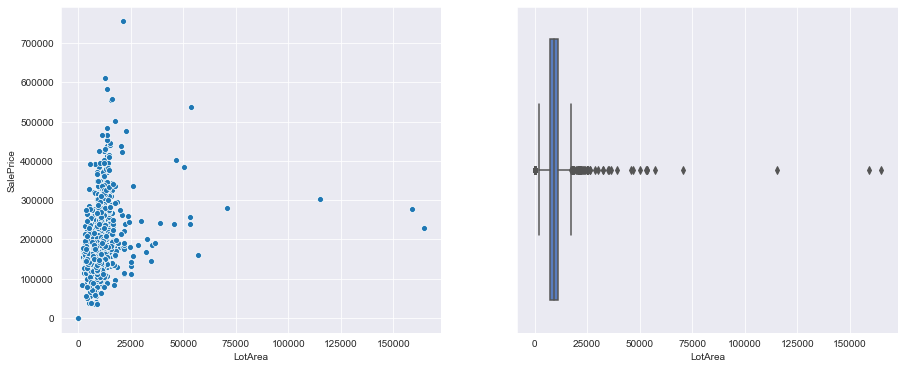

In [295]:
scatter_and_box(area_num_var[0])

Outliers present are need to be dealt.

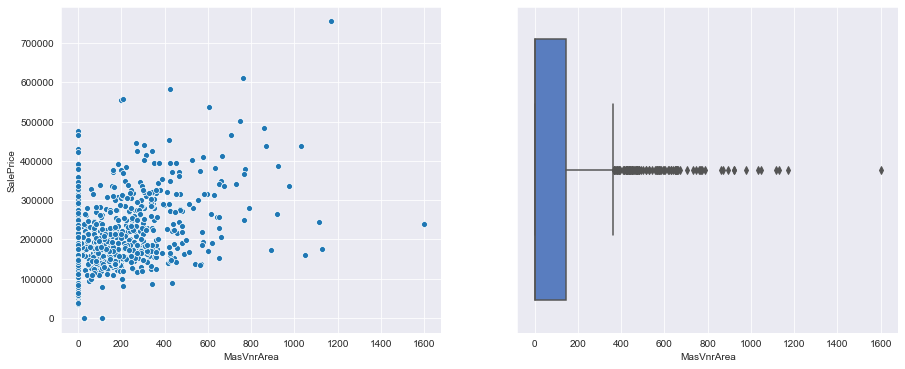

In [296]:
scatter_and_box(area_num_var[1])

There are some outliers running away from the monotonically increasing pattern of data, this needs to be dealt.

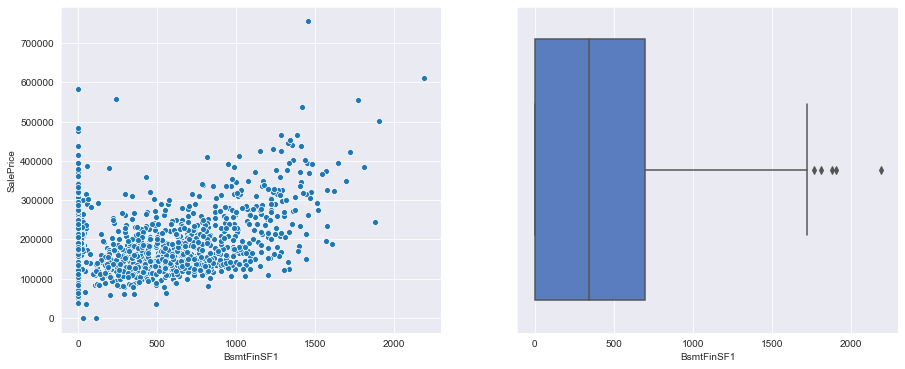

In [297]:
scatter_and_box(area_num_var[2])

No need to disturb data.

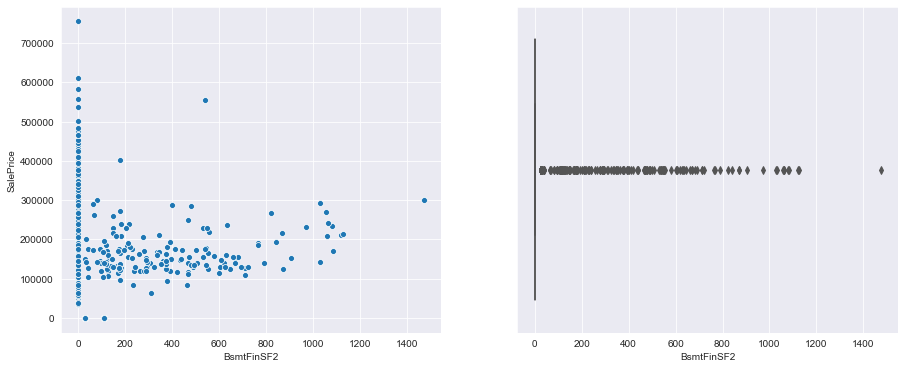

In [298]:
scatter_and_box(area_num_var[3])

Since the value of feature is 0 for maximum observations, therefore in an attempt to control outlier we may loose significant information.

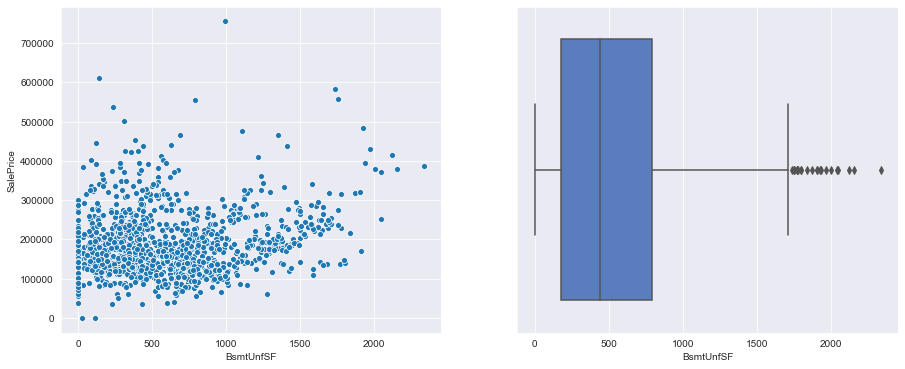

In [299]:
scatter_and_box(area_num_var[4])

Let this feature be as it is.

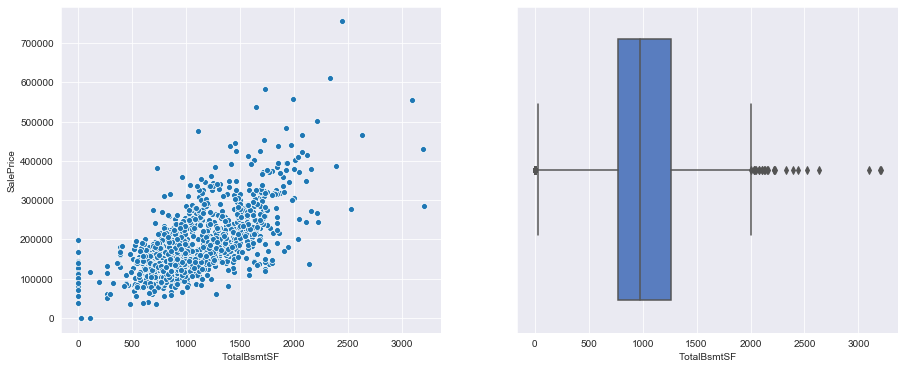

In [300]:
scatter_and_box(area_num_var[5])

The 3 points beyond 3000 needs to be taken care of

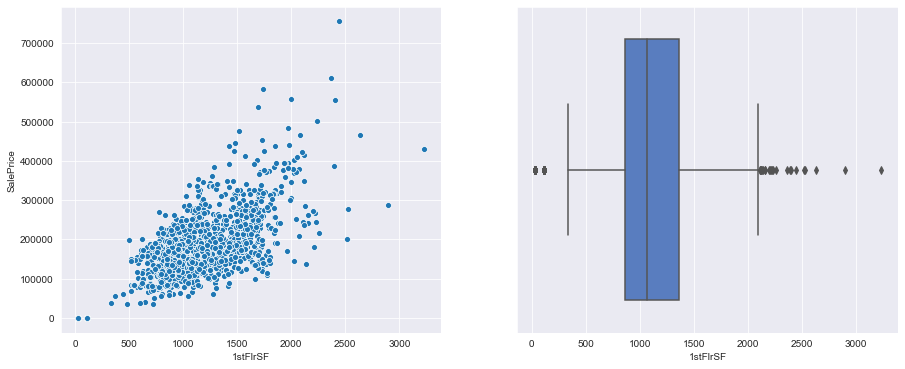

In [301]:
scatter_and_box(area_num_var[6])

We can leave this feature as it is

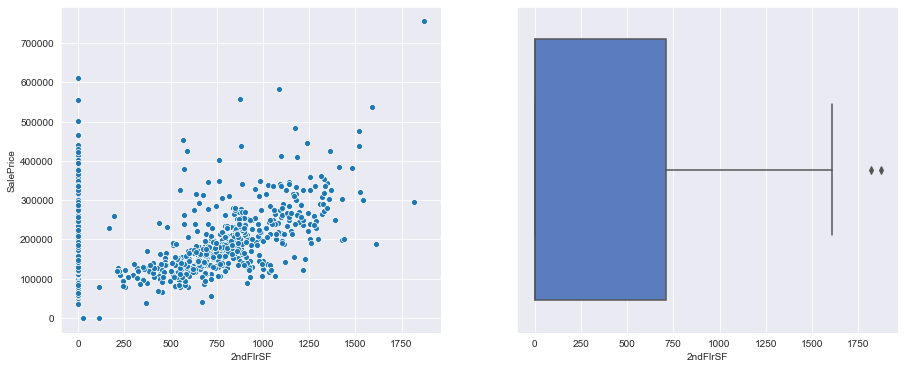

In [302]:
scatter_and_box(area_num_var[7])

Outlier needs to be dealt

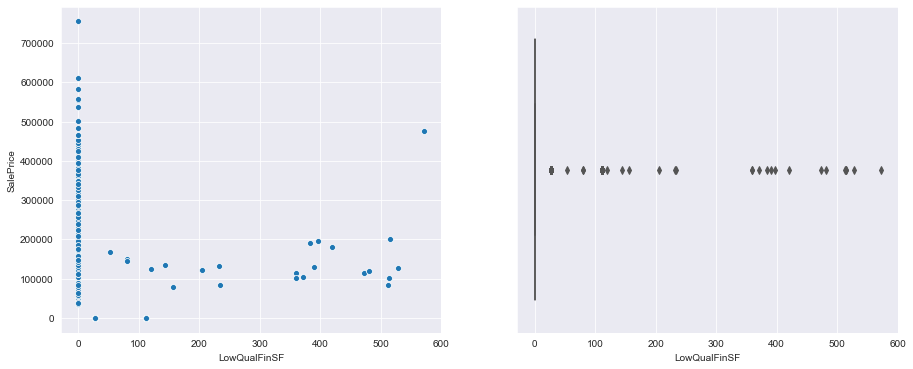

In [303]:
scatter_and_box(area_num_var[8])

Since the value of feature is 0 for maximum observations, therefore in an attempt to control outlier we may loose significant information.

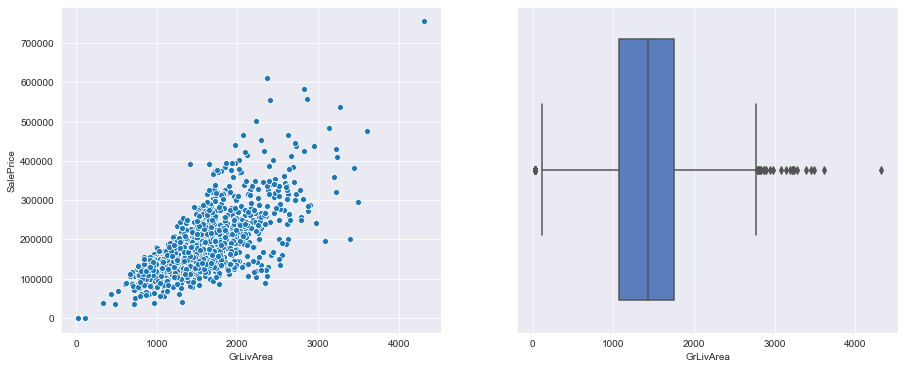

In [304]:
scatter_and_box(area_num_var[9])

There seems to be some outliers present but through scatter plot we can see that the outlier follow the monotonically increasing pattern of rest of the data, therefore we can leave it as it is.

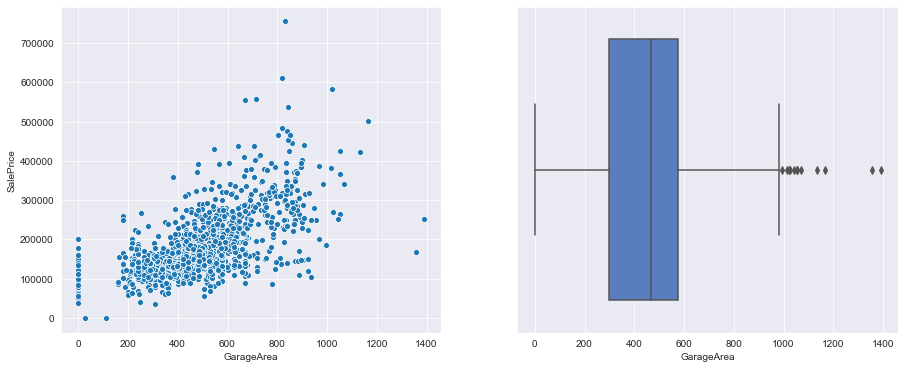

In [305]:
scatter_and_box(area_num_var[10])

There are 2 outliers which are against the pattern followed by the entire data. This needs to be taken care of.

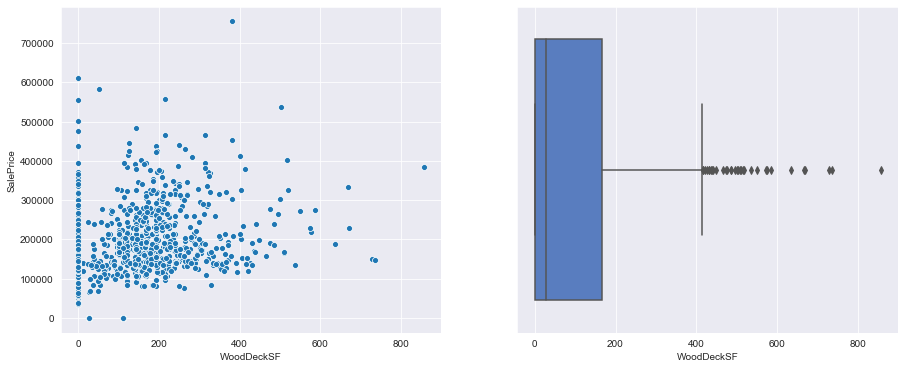

In [306]:
scatter_and_box(area_num_var[11])

Values are very dispersed. Outliers to be dealt.

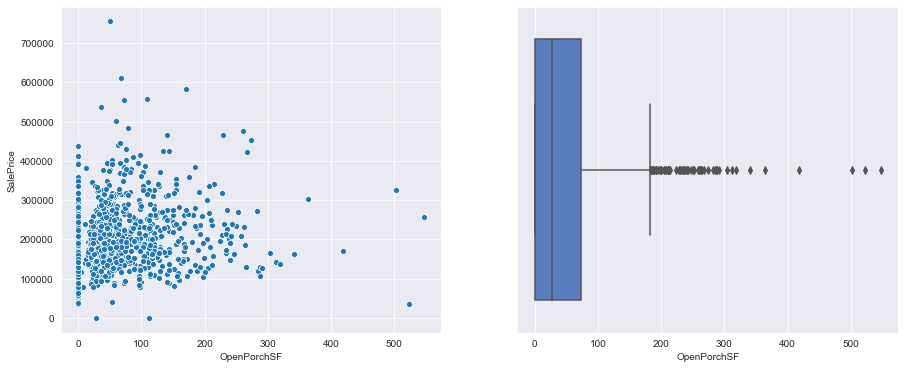

In [307]:
scatter_and_box(area_num_var[12])

Values are highly dispersed. Outliers to be dealt.

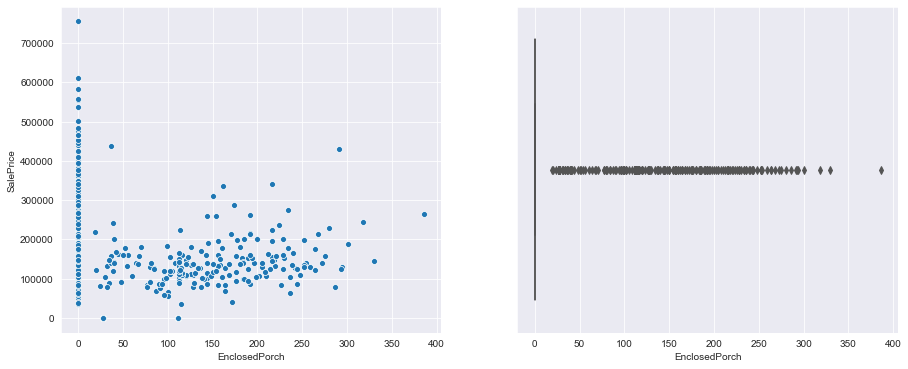

In [308]:
scatter_and_box(area_num_var[13])

Since the value of feature is 0 for maximum observations, therefore in an attempt to control outlier we may loose significant information.

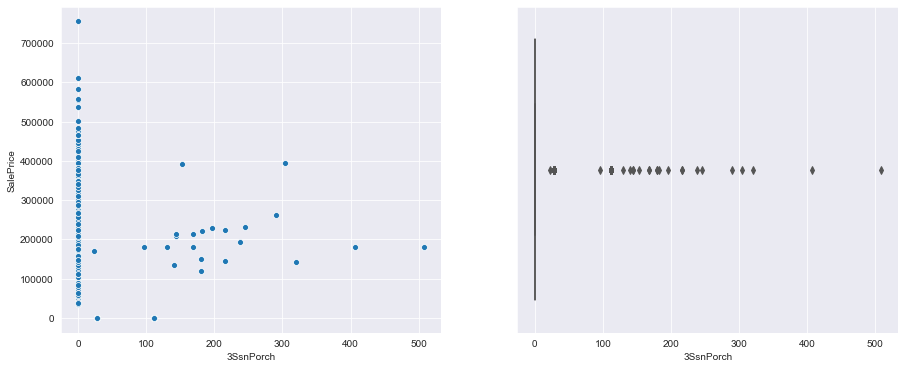

In [309]:
scatter_and_box(area_num_var[14])

Since the value of feature is 0 for maximum observations, therefore in an attempt to control outlier we may loose significant information.

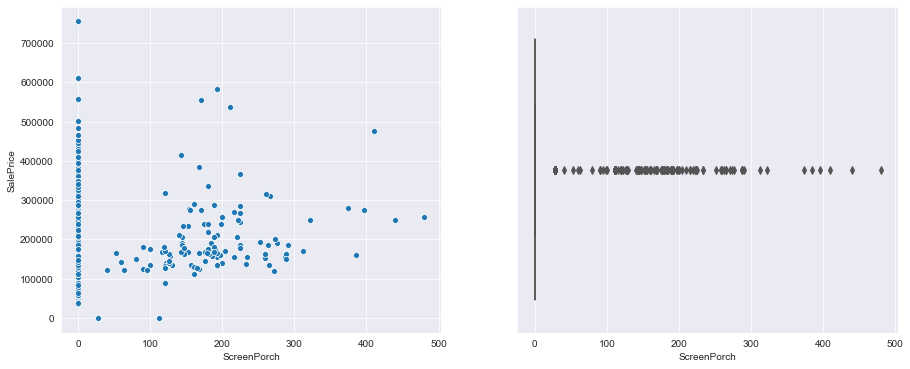

In [310]:
scatter_and_box(area_num_var[15])

Since the value of feature is 0 for maximum observations, therefore in an attempt to control outlier we may loose significant information.

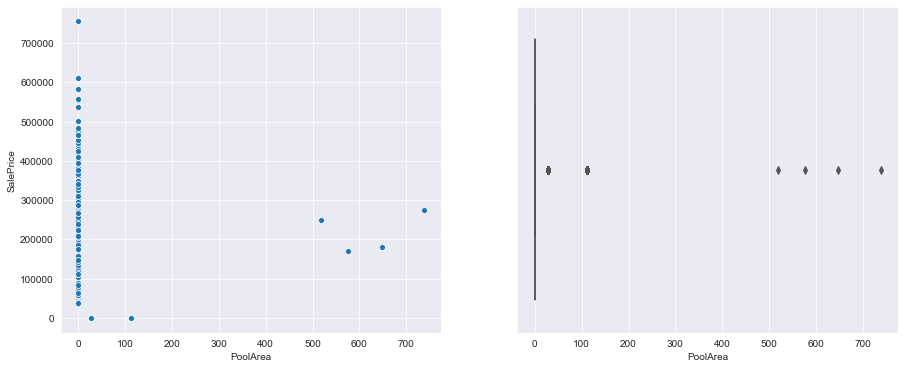

In [311]:
scatter_and_box(area_num_var[16])

The value of feature is non-zero for very few observations, therefore in an attempt to control outlier we may loose significant information.